AV.PS4A..BHE | 2021-07-29T06:14:47.008000Z - 2021-07-29T06:19:47.008000Z | 50.0 Hz, 15001 samples
AV.PS4A..BHN | 2021-07-29T06:14:47.008000Z - 2021-07-29T06:19:47.008000Z | 50.0 Hz, 15001 samples
AV.PS4A..BHZ | 2021-07-29T06:14:47.008000Z - 2021-07-29T06:19:47.008000Z | 50.0 Hz, 15001 samples
AV.PS4A..BHE | 2021-07-29T06:14:47.008000Z - 2021-07-29T06:19:47.008000Z | 50.0 Hz, 15001 samples
AV.PS4A..BHN | 2021-07-29T06:14:47.008000Z - 2021-07-29T06:19:47.008000Z | 50.0 Hz, 15001 samples
AV.PS4A..BHZ | 2021-07-29T06:14:47.008000Z - 2021-07-29T06:19:47.008000Z | 50.0 Hz, 15001 samples
3 Trace(s) in Stream:
AV.PS4A..BHE | 2021-07-29T06:14:47.000000Z - 2021-07-29T06:19:47.000000Z | 1.0 Hz, 301 samples
AV.PS4A..BHN | 2021-07-29T06:14:47.000000Z - 2021-07-29T06:19:47.000000Z | 1.0 Hz, 301 samples
AV.PS4A..BHZ | 2021-07-29T06:14:47.000000Z - 2021-07-29T06:19:47.000000Z | 1.0 Hz, 301 samples


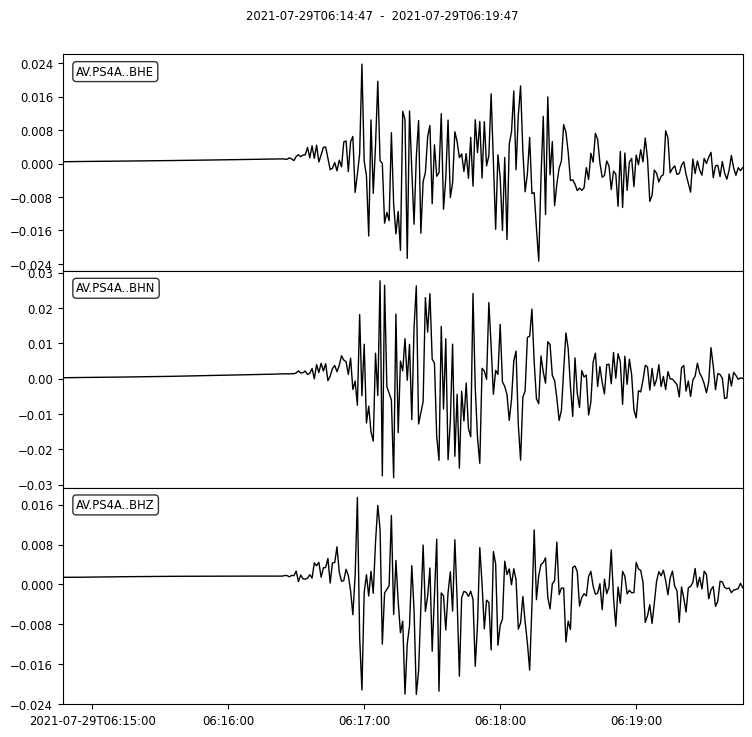

In [9]:
######## GNSS instavel Vs strong-motion derived velocity analysis and plots ##################
################################## Scipy version #############################################
####################################### Goals ################################################
#     1) Read a GNSS instavel and convert it into an obspy stream
#     2) Filter instavel
#     3) Load acceleration from IRIS client
#     4) Filter and integrate strong-motion acceleration to corresponding velocity
#     5) Subtract/find difference between GNSS and strong motion veocity
#     6) Subtract the difference from GNSS and plot trace
#     7) cross-correlate and plot both versions
##############################################################################################

from obspy import UTCDateTime 				
from obspy import Trace
from obspy import Stream
from obspy import read_inventory
from obspy.clients.fdsn import Client 		
client=Client("IRIS")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# LOAD ONE SEISMIC ACCELERATION STREAM FROM IRIS DMC
start = UTCDateTime("2021-07-29T06:14:47.008000Z")
st_seis_v = client.get_waveforms('AV', 'PS4A', "*", 'BH*', (start), (start+300), attach_response=True)
st_seis_v.remove_response(inventory=None, output="VEL", plot=False)
#st_seis_ae[0].plot()
print(st_seis_v[0])
print(st_seis_v[1])
print(st_seis_v[2])


# CREATE A SEISMIC VELOCITY TRACE
st_seis_ve = st_seis_v[0].copy()
hze = st_seis_ve.data[::50]   # Brute-force 'downsampling' of strong-motion derived velocity to 1 Hz post-filtering and -integration
st_seis_vn = st_seis_v[1].copy()
hzn = st_seis_vn.data[::50]
st_seis_vz = st_seis_v[2].copy()
hzz = st_seis_vz.data[::50]
print(st_seis_ve)
print(st_seis_vn)
print(st_seis_vz)
#st_seis_ve.plot()
#print(st_seis_ve.max())

# CREATE AN st_sm_vEMPTY STREAM AND POPULATE WITH 1Hz STRONG-MOTION DERIVED VELOCITY DATA
st_sm_ve = Trace()
st_sm_ve.stats.network = 'AV'
st_sm_ve.stats.station = 'PS4A'
st_sm_ve.stats.channel = 'BHE'    
st_sm_ve.stats.starttime = UTCDateTime("2021-07-29T06:14:47.0Z")
st_sm_ve.stats.sampling_rate = 1
st_sm_ve.stats.calib = 1
st_sm_ve.data = hze
st_sm_vn = Trace()
st_sm_vn.stats.network = 'AV'
st_sm_vn.stats.station = 'PS4A'
st_sm_vn.stats.channel = 'BHN'    
st_sm_vn.stats.starttime = UTCDateTime("2021-07-29T06:14:47.0Z")
st_sm_vn.stats.sampling_rate = 1
st_sm_vn.stats.calib = 1
st_sm_vn.data = hzn
st_sm_vz = Trace()
st_sm_vz.stats.network = 'AV'
st_sm_vz.stats.station = 'PS4A'
st_sm_vz.stats.channel = 'BHZ'    
st_sm_vz.stats.starttime = UTCDateTime("2021-07-29T06:14:47.0Z")
st_sm_vz.stats.sampling_rate = 1
st_sm_vz.stats.calib = 1
st_sm_vz.data = hzz
st_sm_v = Stream(traces=[st_sm_ve, st_sm_vn, st_sm_vz])
print(st_sm_v)
t = UTCDateTime("2021-07-29T06:15:47.000000Z")
tt = st_sm_ve.times()
#dt = tt - t
# CREATE STREAMS WITH ALL TRACES AND PLOT THEM
st = Stream([st_sm_ve, st_sm_vn, st_sm_vz])
st.plot(equal_scale=False, automerge=False)

pd.concat([pd.DataFrame(tt), pd.DataFrame(hzn), pd.DataFrame(hze), pd.DataFrame(hzz)], axis=1).to_csv('PS4A.csv')
